<a href="https://colab.research.google.com/github/pacomm5/curso-series-temporales/blob/master/12.%20Prediciendo%20el%20futuro/Python/20_Invirtiendo_la_diferenciaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df_comp = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df_comp.shape)  # (123, 8)
df_comp.tail()
# la fecha es trimestral. 

(123, 8)


rgnp    pgnp    ulc  gdfco    gdf  gdfim  gdfcf  gdfce
date                                                                
1988-07-01  4042.7  3971.9  179.6  131.5  124.9  106.2  123.5   92.8
1988-10-01  4069.4  3995.8  181.3  133.3  126.2  107.3  124.9   92.9
1989-01-01  4106.8  4019.9  184.1  134.8  127.7  109.5  126.6   94.0
1989-04-01  4132.5  4044.1  186.1  134.8  129.3  111.1  129.0  100.6
1989-07-01  4162.9  4068.4  187.4  137.2  130.2  109.8  129.9   98.2

In [ ]:
dat=df_comp['gdfim']
dat.head()
# nos quedamos con esta única columna. 

date
1959-01-01    26.9
1959-04-01    27.0
1959-07-01    27.1
1959-10-01    27.1
1960-01-01    27.2
Name: gdfim, dtype: float64

In [ ]:
import statsmodels.tsa.stattools as sts
result = sts.adfuller(dat)
print('p-value: %f' % result[1])
# aqui vemos si es estacional. nos dicee que no es estacionaria. 

p-value: 0.938674


In [ ]:
dat_transformed=dat.diff().dropna()
dat_transformed.tail()
# vamos a ddiferenciación, pero quitamos los nan. 

date
1988-07-01    0.1
1988-10-01    1.1
1989-01-01    2.2
1989-04-01    1.6
1989-07-01   -1.3
Name: gdfim, dtype: float64

In [ ]:
result = sts.adfuller(dat_transformed)
print('p-value: %f' % result[1])
# volvemos a comprobar si es estacional. podriamos haceer más si no nos diera correcto.....
# ya cumple la estacionalidad. 

p-value: 0.000554


In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima


In [ ]:
model_auto = auto_arima(dat_transformed,d=0) # le decimos que no haga integración. por que sin ponemos nada nos puede volver a diferenciar......

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model_auto # aqui nos dice el orden del modelo. nos dice que el mejor modelo es 1,0,0

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [ ]:
pred=model_auto.predict(n_periods = 10) # queremos hacer predicciones a 10 periodos.
df_auto_pred = pd.DataFrame(pred)

In [ ]:
df_forecast= dat.iloc[-1] + df_auto_pred.cumsum() # me voy a los datos originales y cojo el último dato. aqui estamos revirtiendo la transformación o diferenciación. 
# que no son los mismos que si no revertimos la transformación. 

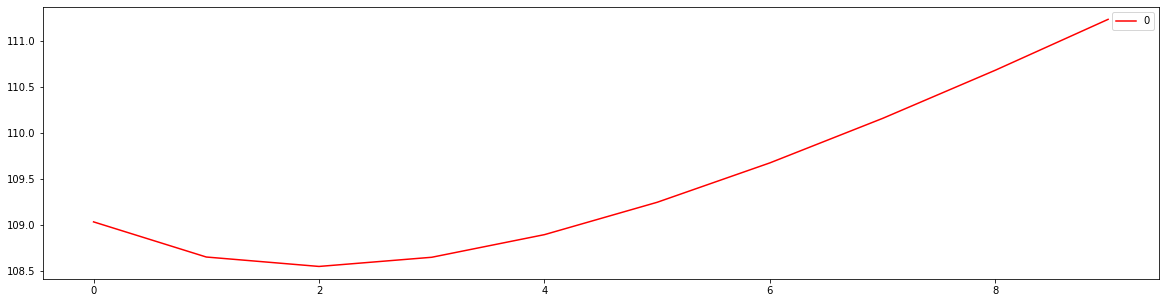

In [ ]:
df_forecast.plot(figsize = (20,5), color = "red")

In [ ]:
dates=pd.date_range(start="1989-10-01",freq='QS',periods=10) # la frecuencia es trimestral. 
dates
# tenemos cual es la última fecha de dat que es el original. 

DatetimeIndex(['1989-10-01', '1990-01-01', '1990-04-01', '1990-07-01',
               '1990-10-01', '1991-01-01', '1991-04-01', '1991-07-01',
               '1991-10-01', '1992-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [ ]:
df_forecast.index=dates
df_forecast.columns=['Predictions']
df_forecast.head()
# vamos a ponerle las predicciones con sus fechas. 

Predictions
1989-10-01   109.033172
1990-01-01   108.651989
1990-04-01   108.549744
1990-07-01   108.649255
1990-10-01   108.894696

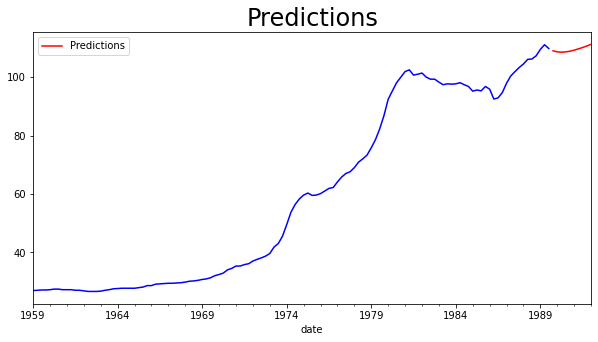

In [ ]:
import matplotlib.pyplot as plt

df_forecast.plot(figsize = (10,5), color = "red")
dat.plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()